We explore problem $5$, "Coin in Square," from the book *Fifty Challenging Problems in Probability*, by Frederick Mosteller. The problem statement is as follows:
>  In a common carnival game a player tosses a penny from a distance of about $5$ feet onto the surface of a table ruled in $1$-inch squares. If the penny ($3/4$ inch in diameter) falls entirely inside a square, the player receives $5$ cents but does not get his penny back; otherwise he loses his penny. If the penny lands on the table, what is his chance to win?

The first observation to make is that the table is covered completely by identical $1$-inch squares; thus, when we flip the coin and it lands on the table, the center of the coin lands in exactly one $1$-inch square. Because of this, the probability that the coin landed entirely inside a square is equal to the probability that the coin lands entirely inside the arbitrary square within which its center landed, as the coin has zero probability of landing entirely inside any other square. We can therefore simplify the problem and only consider the probability that a coin lands entirely inside of a square, given that its center has landed in the square.

Next, we realize that for the coin to land entirely inside of a given square, the coin's center must land near the center of that square. Specifically, the coin's center must land within $1/8$ of an inch of the square's center in both the horizontal and vertical directions, meaning that the coin's center must land within a smaller square (with side length $1/4$) which is centered at the center of the larger square.

This smaller square has area $(1/4)^2 = 1/16$, and because the larger square has area $1$, we conclude that the probability that the coin's center lands within the smaller square is $1/16$. By our reasoning above, this should also give us the probability that a coin which lands on the table will fall entirely inside a square.

We simulate this below. First, we create a function which will flip a coin onto a hypothetical table consisting of a single $1$-inch square some specified number of times, and record whether the center of the coin landed within the smaller, $1/4$-inch square in the middle of the table.

In [89]:
import numpy as np
from numpy.random import default_rng

#function to generate coin flip samples
def coin_flipper(n_samples, seed=42):
    x_y = default_rng(seed).random((n_samples, 2)) - 0.5 #translate to origin by subtracting 0.5
    
    #create subsets for elements within and outside of the desired square
    in_square = x_y[np.all(np.less(abs(x_y), 0.125), axis=1)]
    out_square = x_y[np.any(np.greater_equal(abs(x_y), 0.125), axis=1)]
    
    return in_square, out_square

#generate 1000 samples
in_square, out_square = coin_flipper(1000)

Next, we plot the results of the $1000$ samples we generated above to see where the center of the coin landed each time.

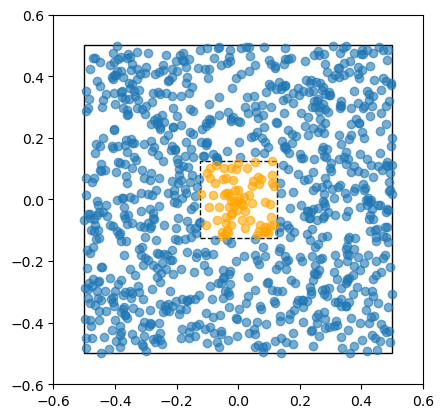

In [90]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#plot our results
fig, ax = plt.subplots()
square_sm = patches.Rectangle((-0.125,-0.125), 0.25, 0.25, linewidth=1, linestyle='--', fc='white',ec="black")
square_big = patches.Rectangle((-0.5,-0.5), 1, 1, linewidth=1, fc='white',ec="black")
ax.add_patch(square_big)
ax.add_patch(square_sm)
ax.scatter(out_square[:, 0], out_square[:, 1], alpha=0.6)
ax.scatter(in_square[:, 0], in_square[:, 1], alpha=0.6, color='orange')
ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)
ax.set_aspect('equal', adjustable='box')
plt.show()

To make sure that our logic is sound, we check that the coins whose centers landed inside the smaller $1/4$-inch square (colored in orange) indeed fell entirely within the larger square each time, and that the coins whose centers landed outside of the smaller $1/4$-inch square (colored in blue) landed partially outside of the larger square.

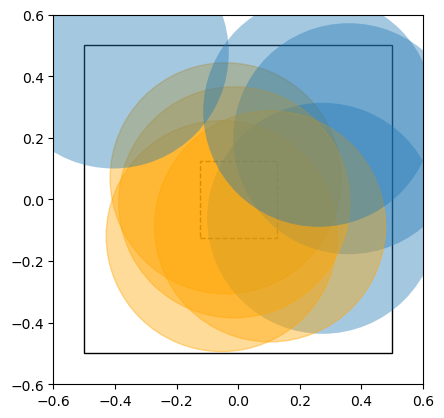

In [91]:
#look at some circles that landed inside the square or outside
fig, ax = plt.subplots()
square_sm = patches.Rectangle((-0.125,-0.125), 0.25, 0.25, linewidth=1, linestyle='--', fc='white',ec="black")
square_big = patches.Rectangle((-0.5,-0.5), 1, 1, linewidth=1, fc='white',ec="black")
ax.add_patch(square_big)
ax.add_patch(square_sm)

#draw example circles
for i in range(4):
    circle_in = patches.Circle((in_square[i, 0], in_square[i, 1]), 
                               radius=0.375, 
                               ec='orange', fc='orange', 
                               alpha=0.4)
    circle_out = patches.Circle((out_square[i, 0], out_square[i, 1]), 
                                radius=0.375, 
                                alpha=0.4)
    ax.add_patch(circle_in)
    ax.add_patch(circle_out)

#set plot specifications
ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)
ax.set_aspect('equal', adjustable='box')
plt.show()

We observe that every coin in orange has landed entirely inside the square, while every coin in blue is partially outside of the square. We can now compute the approximate probability of a coin landing inside the square based on the $1000$ samples we generated.

In [92]:
#approximate probability of coin landing entirely inside the square
len(in_square)/ (len(in_square) + len(out_square))

0.073

While $0.073$ is not quite equal to $1/16$, this is to be expected given that we only generated $1000$ samples. Below, we check to make sure that, as the number of samples grows large, we do approach the desired probability.

In [95]:
#find probability as n_samples increases
for i in range(1, 8):
    n_samples = 10 ** i
    in_sq, out_sq = coin_flipper(n_samples)
    ratio = len(in_sq)/ (len(in_sq) + len(out_sq))
    print(f'ratio at n_samples = {n_samples}: {ratio}')

ratio at n_samples = 10: 0.0
ratio at n_samples = 100: 0.03
ratio at n_samples = 1000: 0.073
ratio at n_samples = 10000: 0.0626
ratio at n_samples = 100000: 0.06328
ratio at n_samples = 1000000: 0.062748
ratio at n_samples = 10000000: 0.0625615


We can see that the ratio of coins landing inside the square to all coins we flip is approaching $0.0625$, or $1/16$, as we increase the number of samples.